In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
vars = {0.1, 0.5}
gammas = {0.3, 0.7}

In [ ]:
def interval_a(n, var, gamma):
    sum = np.sum(np.square(np.random.default_rng().normal(0, var, n)))
    first = stats.chi2.ppf((1 + gamma) / 2, n)
    second = stats.chi2.ppf((1 - gamma) / 2, n)
    return sum * (1 / second - 1 / first)

def interval_b(n, var, gamma):
    sum = np.square(np.mean(np.random.default_rng().normal(0, var, n)))
    first = stats.norm.ppf((3 + gamma) / 4)
    second = stats.norm.ppf((3 - gamma) / 4)
    return n * sum * (1 / second ** 2 - 1 / first ** 2)

In [ ]:
def build(var, gamma, iters, interval) -> NoReturn:
    results = []
    for n in range(1, 100):
      sum = 0.0
      for _ in range(iters):
          sum += interval(n, var, gamma) 
      results.append(sum / iters)
  
    plt.plot(range(1, 100), results)
    plt.xlabel('Samples')
    plt.ylabel('Length of interval')
    plt.title(f'var={var}, gamma={gamma}')
    plt.show()

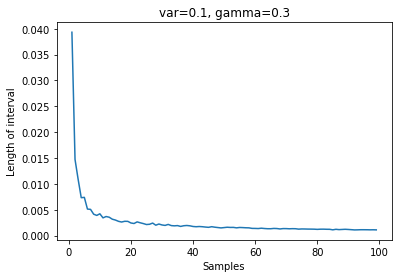

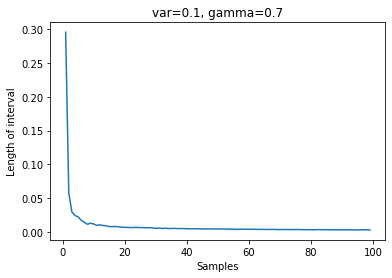

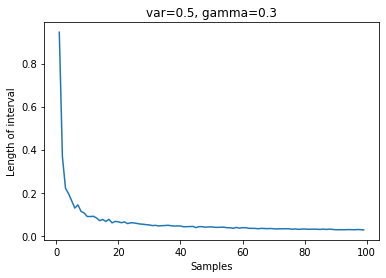

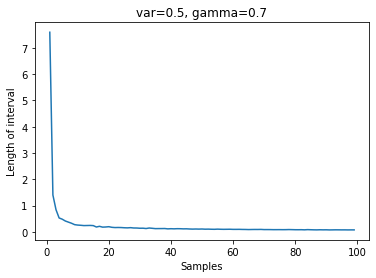

In [ ]:
for var in vars:
    for gamma in gammas:
        build(var, gamma, 50, interval_a)

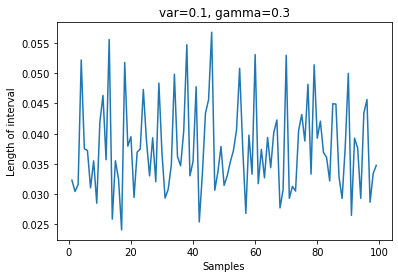

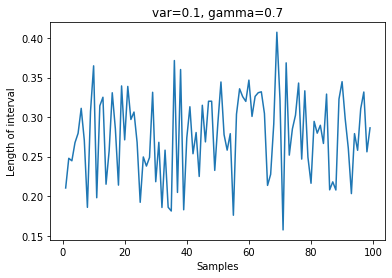

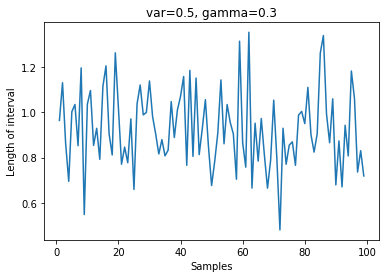

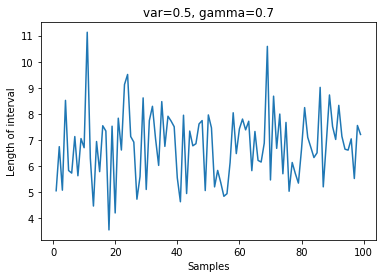

In [ ]:
for var in vars:
    for gamma in gammas:
        build(var, gamma, 50, interval_b)